In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'2.4.1'

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
x_train.shape
#(50000 samples, 32x32 pixels, 3 dimensions:RGB)

(50000, 32, 32, 3)

In [7]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
def plot(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])
    print(classes[y_train[index][0]])

frog


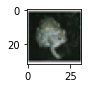

In [9]:
plot(234)

In [10]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [11]:
y_train_categorical = keras.utils.to_categorical(y_train,
                                                 num_classes=10,
                                                 dtype='float32')
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
y_test_categorical = keras.utils.to_categorical(y_test,
                                                 num_classes=10,
                                                 dtype='float32')

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])

model.compile(optimizer='SGD',
             loss='categorical_crossentropy', #used for one hot encoded y
             metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.9348 - accuracy: 0.3031
Epoch 2/10
 651/1563 [===========>..................] - ETA: 22s - loss: 1.6485 - accuracy: 0.4183

KeyboardInterrupt: 